<a href="https://colab.research.google.com/github/singhtejus/Materials-detection-AI/blob/main/RF_%26_FE_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files
import os 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# copy it there

Mounted at /content/drive


In [3]:
os.mkdir('/content/test_folder')

In [ ]:
import cv2
SIZE = 224
test_images = []
test_folder = '/content/test_folder'
filelist = os.listdir(test_folder)
 
for item in filelist:
  print(item)
  img_path = os.path.join(test_folder,item)
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
  img = cv2.resize(img, (SIZE, SIZE))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  test_images.append(img)

test_images = np.array(test_images)
x_test = test_images/255.0
print(x_test.shape)

PLASTICPARTS_41.jpg
WTXCtPFr6P7EygfJZ8DsA3-1200-80.jpg
PAPERMAIL_10.jpg
plastic116.jpg
(4, 224, 224, 3)


In [ ]:
from keras.applications.vgg16 import VGG16
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
import joblib
RF_model = joblib.load('/content/drive/MyDrive/colab/RF_model_trained')

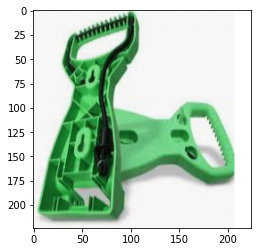

The prediction for this image is:  plastic


In [ ]:
from sklearn import preprocessing

labels = ["cardboard", "glass", "metal","paper","plastic"]
img = x_test[0]
plt.imshow(img)
plt.show()
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)

input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = labels[prediction_RF]
print("The prediction for this image is: ", prediction_RF)